<a href="https://colab.research.google.com/github/np03cs5a250002-cmyk/concept-and-technology-of-ai/blob/main/2612152_prayash_paudel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment I : Statistical Interpretation and Exploratory Data Analysis
Analysis of the Human Development Index (HDI)

Course: Concepts and Technologies of AI (5CS037)
Student Name: Prayash paoudel
Student ID:
Dataset: Human_Development_Index_Dataset.csv
Submission Date: 10 January, 2026


Table of Contents
1. Problem 1A: Exploration of Single Year HDI (2022)
2. Problem 1B: HDI Trend Analysis (2020–2022)
3. Problem 2: Advanced HDI Exploration (South Asia)
4. Problem 3: Comparative Regional Analysis

 1. Problem 1A – Exploration of Single Year HDI  (2022)


Task 1: Extract Latest Year (2022)

In [27]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
file_path = "/content/drive/MyDrive/Human_Development_Index_Dataset.csv"
df = pd.read_csv(file_path, encoding="latin1")


In [29]:
df.columns = df.columns.str.lower().str.strip().str.replace(' ', '_')

# 3. Define Region Mapping
# We need specific regions: "South Asia" and "Middle East".
# For the rest, we will map to broader continents to make Problem 1B meaningful.

iso_to_region = {
    # South Asia
    'AFG': 'South Asia', 'BGD': 'South Asia', 'BTN': 'South Asia', 'IND': 'South Asia',
    'IRN': 'South Asia', 'MDV': 'South Asia', 'NPL': 'South Asia', 'PAK': 'South Asia', 'LKA': 'South Asia',

    # Middle East (Western Asia + North Africa typically)
    'ARE': 'Middle East', 'BHR': 'Middle East', 'DJI': 'Middle East', 'DZA': 'Middle East',
    'EGY': 'Middle East', 'IRQ': 'Middle East', 'JOR': 'Middle East', 'KWT': 'Middle East',
    'LBN': 'Middle East', 'LBY': 'Middle East', 'MAR': 'Middle East', 'OMN': 'Middle East',
    'PSE': 'Middle East', 'QAT': 'Middle East', 'SAU': 'Middle East', 'SYR': 'Middle East',
    'TUN': 'Middle East', 'YEM': 'Middle East', 'TUR': 'Middle East', 'ISR': 'Middle East',

    # North America
    'USA': 'North America', 'CAN': 'North America', 'MEX': 'North America',

    # Europe (Sample of major ones)
    'GBR': 'Europe', 'FRA': 'Europe', 'DEU': 'Europe', 'ITA': 'Europe', 'ESP': 'Europe',
    'NOR': 'Europe', 'SWE': 'Europe', 'DNK': 'Europe', 'FIN': 'Europe', 'ISL': 'Europe',
    'RUS': 'Europe', 'UKR': 'Europe', 'POL': 'Europe', 'NLD': 'Europe', 'BEL': 'Europe',
    'CHE': 'Europe', 'AUT': 'Europe', 'PRT': 'Europe', 'GRC': 'Europe', 'IRL': 'Europe',

    # East Asia & Pacific
    'CHN': 'East Asia', 'JPN': 'East Asia', 'KOR': 'East Asia', 'PRK': 'East Asia',
    'MNG': 'East Asia', 'AUS': 'Oceania', 'NZL': 'Oceania',

    # Sub-Saharan Africa (Sample)
    'ZAF': 'Sub-Saharan Africa', 'NGA': 'Sub-Saharan Africa', 'KEN': 'Sub-Saharan Africa',
    'ETH': 'Sub-Saharan Africa', 'GHA': 'Sub-Saharan Africa',

    # South America
    'BRA': 'South America', 'ARG': 'South America', 'CHL': 'South America',
    'COL': 'South America', 'PER': 'South America'
}

In [30]:
def get_region(iso_code):
    return iso_to_region.get(iso_code, 'Rest of World')

# Apply mapping
df['region'] = df['iso3'].apply(get_region)

In [31]:
print("Unique Regions created:", df['region'].unique())
print("\nSample of Data:")
print(df[['country', 'iso3', 'region']].head())

Unique Regions created: ['South Asia' 'Rest of World' 'Middle East' 'South America' 'Oceania'
 'Europe' 'North America' 'East Asia' 'Sub-Saharan Africa']

Sample of Data:
       country iso3      region
0  Afghanistan  AFG  South Asia
1  Afghanistan  AFG  South Asia
2  Afghanistan  AFG  South Asia
3  Afghanistan  AFG  South Asia
4  Afghanistan  AFG  South Asia


In [32]:
print("\nRest of World count:", df[df['region'] == 'Rest of World'].shape[0])

# Save for next steps (simulated persistence)
df.to_csv('hdi_data_processed.csv', index=False)
print("\nProcessed file saved as 'hdi_data_processed.csv'")


Rest of World count: 4521

Processed file saved as 'hdi_data_processed.csv'


Task 2: Data Exploration

In [33]:
df = pd.read_csv("hdi_data_processed.csv")

# 2. Filter for the year 2022
df_2022 = df[df['year'] == 2022].copy()

In [34]:
print("--- Shape of 2022 Dataset ---")
print(df_2022.shape)

print("\n--- Columns & Data Types ---")
print(df_2022.info())

print("\n--- First 5 Rows ---")
print(df_2022.head())

--- Shape of 2022 Dataset ---
(206, 31)

--- Columns & Data Types ---
<class 'pandas.core.frame.DataFrame'>
Index: 206 entries, 32 to 6797
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unnamed:_0                 206 non-null    int64  
 1   iso3                       206 non-null    object 
 2   country                    206 non-null    object 
 3   year                       206 non-null    int64  
 4   hdi                        204 non-null    float64
 5   life_expectancy            206 non-null    float64
 6   pop_millions               206 non-null    float64
 7   hdi_f                      193 non-null    float64
 8   hdi_m                      193 non-null    float64
 9   life_expec_f               206 non-null    float64
 10  life_expec_m               206 non-null    float64
 11  expec_yr_school            205 non-null    float64
 12  expec_yr_school_f          205 non-null

In [35]:
key_cols = ['country', 'hdi', 'life_expectancy', 'mean_yr_school', 'gross_inc_percap']
missing_cols = [col for col in key_cols if col not in df_2022.columns]

if missing_cols:
    print(f"\n[WARNING] Missing key columns: {missing_cols}")
else:
    print("\n[SUCCESS] All key columns for HDI analysis are present.")

# 5. Save the 2022 snapshot for downstream tasks
df_2022.to_csv("hdi_2022_df.csv", index=False)
print("\nFile saved: 'hdi_2022_df.csv'")


[SUCCESS] All key columns for HDI analysis are present.

File saved: 'hdi_2022_df.csv'


Task 3: Missing Values & Data Cleaning

In [36]:
df_2022 = pd.read_csv("hdi_2022_df.csv")

In [37]:
print("--- Missing Values Count per Column ---")
missing_counts = df_2022.isnull().sum()
print(missing_counts[missing_counts > 0])

--- Missing Values Count per Column ---
hdi                           2
hdi_f                        13
hdi_m                        13
expec_yr_school               1
expec_yr_school_f             1
expec_yr_school_m             1
mean_yr_school                2
mean_yr_school_f              2
mean_yr_school_m              2
gross_inc_percap              2
gross_inc_percap_f           13
gross_inc_percap_m           13
gender_development           13
gender_inequality            29
secondary_education_f_%      17
secondary_education_m_%      17
seats_in_parliament_f_%       2
seats_in_parliament_m_%       2
labour_participation_f_%     12
labour_participation_m_%     12
co2_emission_tons             2
mat_footprint_percap_tons    41
dtype: int64


In [38]:
missing_hdi_countries = df_2022[df_2022['hdi'].isnull()]['country'].tolist()
print(f"\nCountries with missing HDI: {missing_hdi_countries}")

# Action: Drop rows where HDI is missing
df_clean = df_2022.dropna(subset=['hdi']).copy()
print(f"Dropped {len(missing_hdi_countries)} rows. New shape: {df_clean.shape}")


Countries with missing HDI: ["Korea (Democratic People's Rep. of)", 'Monaco']
Dropped 2 rows. New shape: (204, 31)


In [39]:
duplicates = df_clean.duplicated(subset=['iso3']).sum()
if duplicates > 0:
    print(f"\n[WARNING] Found {duplicates} duplicate ISO3 codes. Removing duplicates...")
    df_clean = df_clean.drop_duplicates(subset=['iso3'])
else:
    print("\n[SUCCESS] No duplicate countries found.")


[SUCCESS] No duplicate countries found.


In [40]:
remaining_missing = df_clean[['life_expectancy', 'mean_yr_school', 'gross_inc_percap']].isnull().sum()
if remaining_missing.sum() > 0:
    print("\n[NOTE] Remaining missing values in sub-components:")
    print(remaining_missing[remaining_missing > 0])
    # Simple Imputation: Fill with column mean (or region median if we were more advanced, but mean is standard for this level)
    # However, usually HDI calculation requires these. If they are missing but HDI is present, it's odd.
    # Let's inspect.
    print(df_clean[df_clean['mean_yr_school'].isnull()][['country', 'hdi', 'mean_yr_school']])
else:
    print("\n[SUCCESS] No missing values in key sub-components for HDI-ranked countries.")

# 6. Save cleaned data
df_clean.to_csv("hdi_2022_cleaned.csv", index=False)
print("\nFile saved: 'hdi_2022_cleaned.csv'")


[SUCCESS] No missing values in key sub-components for HDI-ranked countries.

File saved: 'hdi_2022_cleaned.csv'


Task 4: Basic Statistics

In [41]:
df_clean = pd.read_csv("hdi_2022_cleaned.csv")

In [42]:
stats_cols = ['hdi', 'life_expectancy', 'mean_yr_school', 'gross_inc_percap']
desc_stats = df_clean[stats_cols].describe().T[['count', 'mean', 'std', 'min', '50%', 'max']]
desc_stats.rename(columns={'50%': 'median'}, inplace=True)

print("--- Descriptive Statistics (2022) ---")
print(desc_stats)

--- Descriptive Statistics (2022) ---
                  count          mean           std         min        median  \
hdi               204.0      0.722887      0.153029    0.380000      0.739500   
life_expectancy   204.0     71.791847      7.758711   52.997000     72.208000   
mean_yr_school    204.0      8.967164      3.177347    1.341352      9.220525   
gross_inc_percap  204.0  20722.658911  22105.824388  690.660758  12663.864770   

                           max  
hdi                    0.96700  
life_expectancy       84.82000  
mean_yr_school        14.25594  
gross_inc_percap  146673.24150  


In [43]:
df_high_hdi = df_clean[df_clean['hdi'] > 0.8].copy()
num_high_hdi = len(df_high_hdi)

print(f"\nNumber of countries with HDI > 0.8: {num_high_hdi}")
print(f"Percentage of countries with HDI > 0.8: {(num_high_hdi / len(df_clean)) * 100:.2f}%")


Number of countries with HDI > 0.8: 71
Percentage of countries with HDI > 0.8: 34.80%


In [44]:
top_10 = df_clean.sort_values(by='hdi', ascending=False).head(10)[['country', 'hdi', 'region']]
print("\n--- Top 10 Countries by HDI (2022) ---")
print(top_10)


--- Top 10 Countries by HDI (2022) ---
                    country    hdi         region
167             Switzerland  0.967         Europe
128                  Norway  0.966         Europe
76                  Iceland  0.959         Europe
74   Hong Kong, China (SAR)  0.956  Rest of World
166                  Sweden  0.952         Europe
46                  Denmark  0.952         Europe
64                  Germany  0.950         Europe
81                  Ireland  0.950         Europe
155               Singapore  0.949  Rest of World
122             Netherlands  0.946         Europe


In [45]:
bottom_5 = df_clean.sort_values(by='hdi', ascending=True).head(5)[['country', 'hdi', 'region']]
print("\n--- Bottom 5 Countries by HDI (2022) ---")
print(bottom_5)


--- Bottom 5 Countries by HDI (2022) ---
                      country    hdi         region
159                   Somalia  0.380  Rest of World
161               South Sudan  0.381  Rest of World
32   Central African Republic  0.387  Rest of World
33                       Chad  0.394  Rest of World
125                     Niger  0.394  Rest of World


In [46]:
desc_stats.to_csv("hdi_2022_stats_summary.csv")
print("\nFile saved: 'hdi_2022_stats_summary.csv'")


File saved: 'hdi_2022_stats_summary.csv'


In [47]:
df = pd.read_csv("hdi_2022_cleaned.csv")

Task 5: Filtering and Sorting

In [48]:
def classify_hdi(hdi):
    if hdi < 0.550:
        return 'Low Human Development'
    elif hdi < 0.700:
        return 'Medium Human Development'
    elif hdi < 0.800:
        return 'High Human Development'
    else:
        return 'Very High Human Development'

In [49]:
df['hdi_category'] = df['hdi'].apply(classify_hdi)

# 3. Analyze the Distribution of Categories
category_counts = df['hdi_category'].value_counts().reindex([
    'Low Human Development',
    'Medium Human Development',
    'High Human Development',
    'Very High Human Development'
])

In [50]:
print("--- HDI Category Counts (2022) ---")
print(category_counts)

--- HDI Category Counts (2022) ---
hdi_category
Low Human Development          35
Medium Human Development       44
High Human Development         54
Very High Human Development    71
Name: count, dtype: int64


In [51]:
df.to_csv("HDI_category_added.csv", index=False)
print("\nFile saved: 'HDI_category_added.csv'")

# 5. Visualizations
plt.figure(figsize=(12, 5))


File saved: 'HDI_category_added.csv'


<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

/tmp/ipython-input-3093667683.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")


([0, 1, 2, 3],
 [Text(0, 0, 'Low Human Development'),
  Text(1, 0, 'Medium Human Development'),
  Text(2, 0, 'High Human Development'),
  Text(3, 0, 'Very High Human Development')])

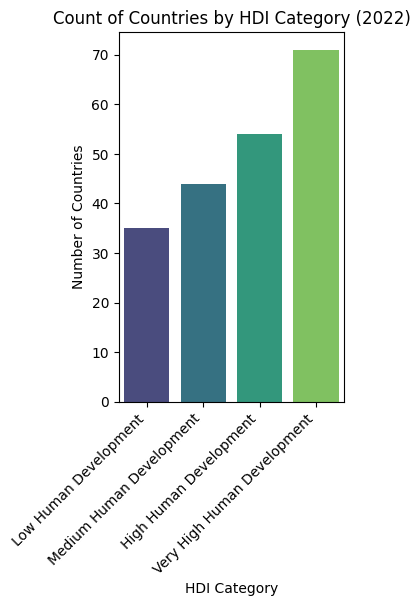

In [52]:
plt.subplot(1, 2, 1)
sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")
plt.title('Count of Countries by HDI Category (2022)')
plt.xlabel('HDI Category')
plt.ylabel('Number of Countries')
plt.xticks(rotation=45, ha='right')

Text(0, 0.5, 'Frequency')

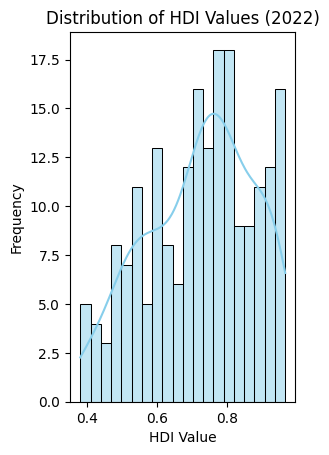

In [53]:
plt.subplot(1, 2, 2)
sns.histplot(df['hdi'], bins=20, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution of HDI Values (2022)')
plt.xlabel('HDI Value')
plt.ylabel('Frequency')

In [54]:
plt.tight_layout()
plt.savefig('task_1a_5_hdi_distribution.png')
print("\nPlot saved: 'task_1a_5_hdi_distribution.png'")
# Note: User cannot see the plot directly here, I will describe it.


Plot saved: 'task_1a_5_hdi_distribution.png'


<Figure size 640x480 with 0 Axes>

Task 6: HDI Category Classification

 2. Problem 1B – HDI Trend Analysis (2020–2022)


In [55]:
df = pd.read_csv("hdi_data_processed.csv")

# 2. Filter for the trend years (2020, 2021, 2022)
trend_years = [2020, 2021, 2022]
df_trend = df[df['year'].isin(trend_years)].copy()

In [56]:
country_counts = df_trend.groupby('country')['year'].count()
valid_countries = country_counts[country_counts == 3].index.tolist()

In [57]:
df_trend_consistent = df_trend[df_trend['country'].isin(valid_countries)].copy()

print(f"Original Country Count: {df['country'].nunique()}")
print(f"Countries with full 2020-2022 data: {len(valid_countries)}")

Original Country Count: 206
Countries with full 2020-2022 data: 206


In [58]:
df_trend_consistent = df_trend_consistent.sort_values(by=['country', 'year'])

# 5. Save the trend dataset
df_trend_consistent.to_csv("hdi_trend_df.csv", index=False)
print("\nFile saved: 'hdi_trend_df.csv'")
print("\n--- Sample of Trend Data ---")
print(df_trend_consistent[['country', 'year', 'hdi']].head(6))


File saved: 'hdi_trend_df.csv'

--- Sample of Trend Data ---
        country  year    hdi
30  Afghanistan  2020  0.488
31  Afghanistan  2021  0.473
32  Afghanistan  2022  0.462
63      Albania  2020  0.784
64      Albania  2021  0.785
65      Albania  2022  0.789


 3. Problem 2 – Advanced HDI Exploration (South Asia)


In [59]:
df_trend = pd.read_csv("hdi_trend_df.csv")
df_pivot = df_trend.pivot(index=['country', 'region', 'iso3'], columns='year', values='hdi').reset_index()

In [60]:
df_pivot.columns.name = None
df_pivot.rename(columns={2020: 'hdi_2020', 2021: 'hdi_2021', 2022: 'hdi_2022'}, inplace=True)

In [61]:
df_pivot['hdi_change_abs'] = df_pivot['hdi_2022'] - df_pivot['hdi_2020']
df_pivot['hdi_pct_change'] = ((df_pivot['hdi_2022'] - df_pivot['hdi_2020']) / df_pivot['hdi_2020']) * 100
df_sorted = df_pivot.sort_values(by='hdi_pct_change', ascending=False)

In [62]:
print("--- Top 5 Countries with Positive HDI Growth (2020-2022) ---")
print(df_sorted[['country', 'region', 'hdi_2020', 'hdi_2022', 'hdi_pct_change']].head(5))

print("\n--- Bottom 5 Countries (Negative Growth) ---")
print(df_sorted[['country', 'region', 'hdi_2020', 'hdi_2022', 'hdi_pct_change']].tail(5))

--- Top 5 Countries with Positive HDI Growth (2020-2022) ---
        country         region  hdi_2020  hdi_2022  hdi_pct_change
11   Azerbaijan  Rest of World     0.722     0.760        5.263158
3       Andorra  Rest of World     0.843     0.884        4.863582
52      Ecuador  Rest of World     0.734     0.765        4.223433
180  Tajikistan  Rest of World     0.656     0.679        3.506098
112    Maldives     South Asia     0.737     0.762        3.392130

--- Bottom 5 Countries (Negative Growth) ---
                                 country         region  hdi_2020  hdi_2022  \
0                            Afghanistan     South Asia     0.488     0.462   
183                          Timor-Leste  Rest of World     0.633     0.566   
94   Korea (Democratic People's Rep. of)      East Asia       NaN       NaN   
122                               Monaco  Rest of World       NaN       NaN   
168                              Somalia  Rest of World       NaN     0.380   

     hdi_pct_cha

In [63]:
df_pivot.to_csv("hdi_growth_analysis.csv", index=False)
print("\nFile saved: 'hdi_growth_analysis.csv'")


File saved: 'hdi_growth_analysis.csv'


 4. Problem 3 – Comparative Regional Analysis (South Asia vs Middle East)

In [64]:
df_trend = pd.read_csv("hdi_trend_df.csv")
global_trend = df_trend.groupby('year')['hdi'].mean().reset_index()

Plot saved: 'task_1b_3_global_trend.png'


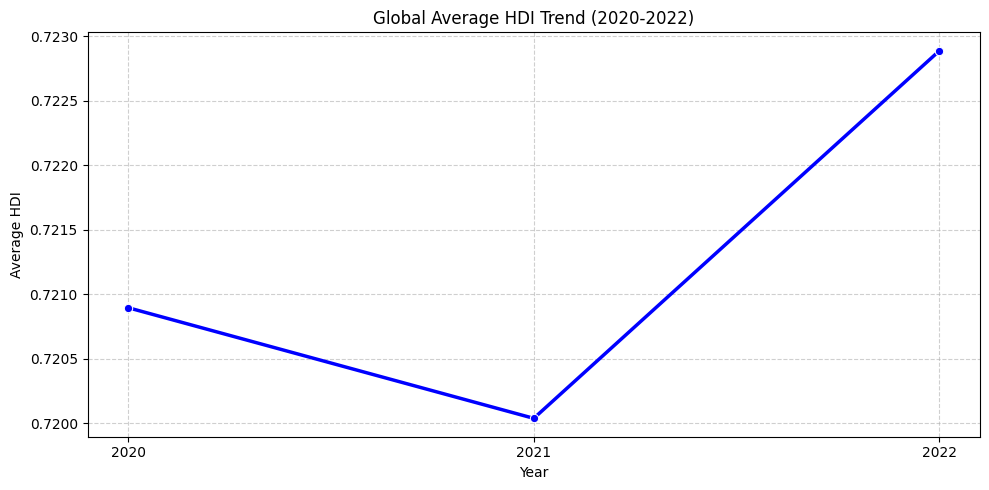

In [65]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=global_trend, x='year', y='hdi', marker='o', color='b', linewidth=2.5)
plt.title('Global Average HDI Trend (2020-2022)')
plt.xlabel('Year')
plt.ylabel('Average HDI')
plt.xticks([2020, 2021, 2022])  # Ensure integer ticks for years
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('task_1b_3_global_trend.png')
print("Plot saved: 'task_1b_3_global_trend.png'")

Plot saved: 'task_1b_3_region_trend.png'


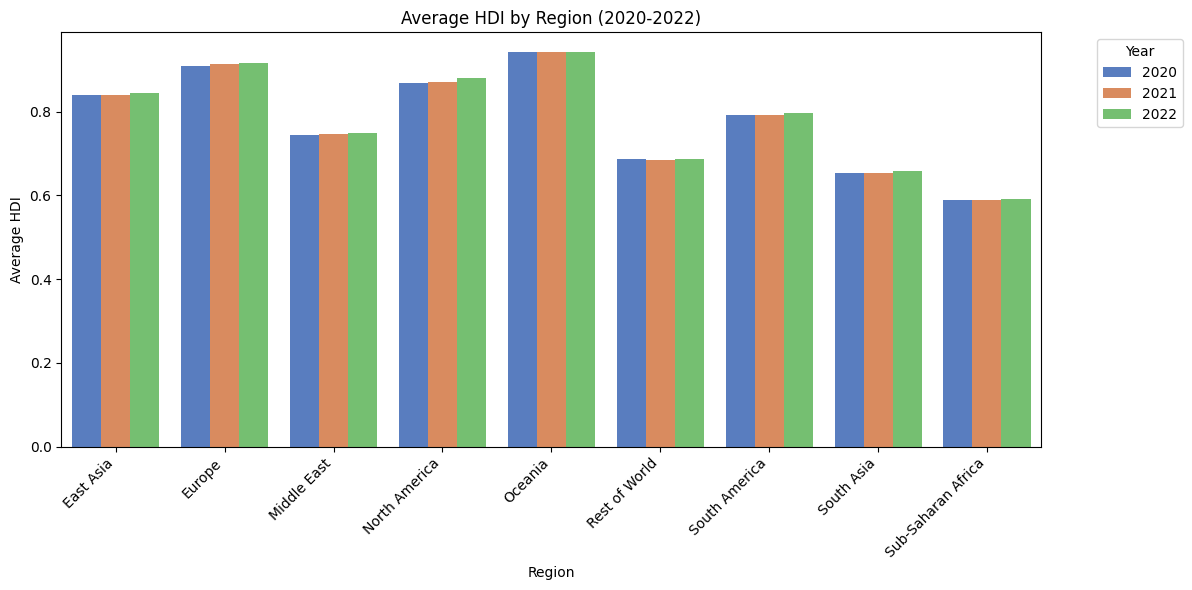

In [66]:
# 3. Visualization 2: Regional HDI Trend (Bar Chart)
# Group by Region and Year
region_trend = df_trend.groupby(['region', 'year'])['hdi'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=region_trend, x='region', y='hdi', hue='year', palette='muted')
plt.title('Average HDI by Region (2020-2022)')
plt.xlabel('Region')
plt.ylabel('Average HDI')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('task_1b_3_region_trend.png')
print("Plot saved: 'task_1b_3_region_trend.png'")

In [67]:
print("\n--- Global Average HDI Values ---")
print(global_trend)

print("\n--- Regional Averages (2022) ---")
print(region_trend[region_trend['year'] == 2022].sort_values(by='hdi', ascending=False))


--- Global Average HDI Values ---
   year       hdi
0  2020  0.720897
1  2021  0.720039
2  2022  0.722887

--- Regional Averages (2022) ---
                region  year       hdi
14             Oceania  2022  0.942500
5               Europe  2022  0.916100
11       North America  2022  0.881000
2            East Asia  2022  0.844500
20       South America  2022  0.797800
8          Middle East  2022  0.750200
17       Rest of World  2022  0.686529
23          South Asia  2022  0.657778
26  Sub-Saharan Africa  2022  0.592000


In [68]:
# Task 2-1: South Asia Filtering & Setup
df = pd.read_csv("hdi_2022_cleaned.csv")

# 2. Filter for South Asia
# We created the 'region' column in Task 1A-1.
df_sa = df[df['region'] == 'South Asia'].copy()

# 3. Validation: List countries found
print("--- South Asian Countries Identified ---")
sa_countries = df_sa['country'].unique()
print(sa_countries)
print(f"Total Count: {len(sa_countries)}")

# 4. Check for key columns specific to Problem 2
# Problem 2 mentions calculating a composite score using Life Expectancy and GNI per capita.
# Ensure these columns are clean for this subset.
print("\n--- Missing Values in South Asia Subset ---")
print(df_sa[['life_expectancy', 'gross_inc_percap']].isnull().sum())

# 5. Save the South Asia subset
df_sa.to_csv("HDI_SouthAsia.csv", index=False)
print("\nFile saved: 'HDI_SouthAsia.csv'")

--- South Asian Countries Identified ---
['Afghanistan' 'Bangladesh' 'Bhutan' 'India' 'Iran (Islamic Republic of)'
 'Maldives' 'Nepal' 'Pakistan' 'Sri Lanka']
Total Count: 9

--- Missing Values in South Asia Subset ---
life_expectancy     0
gross_inc_percap    0
dtype: int64

File saved: 'HDI_SouthAsia.csv'


In [69]:
# Task 2-2: Composite Score Calculation (Manual Formula)

# 1. Load datasets
# We need the global dataset to define the min/max for normalization (Observed Goalposts)
df_global = pd.read_csv("hdi_2022_cleaned.csv")
df_sa = pd.read_csv("HDI_SouthAsia.csv")

# 2. Define Goalposts (Observed Global Min/Max)
# This ensures indices are between 0 and 1 relative to the world in 2022.
le_min = df_global['life_expectancy'].min()
le_max = df_global['life_expectancy'].max()

gni_min = df_global['gross_inc_percap'].min()
gni_max = df_global['gross_inc_percap'].max()

print(f"Goalposts (Observed 2022):\n LE: {le_min}-{le_max}\n GNI: {gni_min}-{gni_max}")

# 3. Calculate Indices for South Asia
# Life Expectancy Index
df_sa['le_index'] = (df_sa['life_expectancy'] - le_min) / (le_max - le_min)

# Income Index (Logarithmic scale for Income)
# Note: HDI standard uses log for income.
df_sa['gni_index'] = (np.log(df_sa['gross_inc_percap']) - np.log(gni_min)) / \
                     (np.log(gni_max) - np.log(gni_min))

# 4. Calculate Composite Score
# Formula: 0.3 * LE_Index + 0.3 * GNI_Index
df_sa['composite_score'] = 0.3 * df_sa['le_index'] + 0.3 * df_sa['gni_index']

# 5. Rank Countries by Composite Score
df_sa_sorted = df_sa.sort_values(by='composite_score', ascending=False)

# 6. Display Result
print("\n--- South Asia: Composite Score Ranking ---")
print(df_sa_sorted[['country', 'hdi', 'le_index', 'gni_index', 'composite_score']])

# 7. Save result
df_sa_sorted.to_csv("HDI_SouthAsia_Composite.csv", index=False)
print("\nFile saved: 'HDI_SouthAsia_Composite.csv'")

Goalposts (Observed 2022):
 LE: 52.997-84.82
 GNI: 690.6607575-146673.2415

--- South Asia: Composite Score Ranking ---
                      country    hdi  le_index  gni_index  composite_score
5                    Maldives  0.762  0.874902   0.617069         0.447591
8                   Sri Lanka  0.780  0.742010   0.531250         0.381978
4  Iran (Islamic Republic of)  0.780  0.677466   0.571584         0.374715
2                      Bhutan  0.681  0.604343   0.510105         0.334334
1                  Bangladesh  0.670  0.650504   0.418717         0.320766
3                       India  0.644  0.463407   0.430905         0.268294
6                       Nepal  0.601  0.549508   0.328978         0.263546
7                    Pakistan  0.540  0.422148   0.382906         0.241516
0                 Afghanistan  0.462  0.310530   0.123022         0.130066

File saved: 'HDI_SouthAsia_Composite.csv'


--- Outlier Detection Statistics ---
Q1: 0.2635 | Q3: 0.3747 | IQR: 0.1112
Bounds: 0.0968 to 0.5415

[RESULT] No mathematical outliers detected in South Asia based on 1.5*IQR.

Plot saved: 'task_2_3_outliers.png'


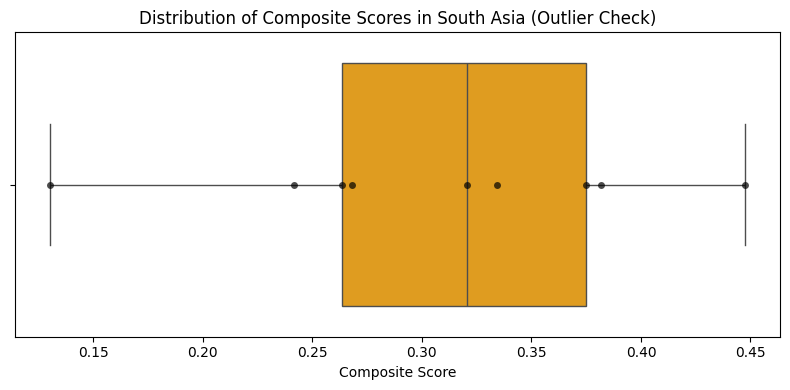

In [70]:
# Task 2-3: Outlier Analysis (South Asia)

# 1. Load the composite score dataset
df_sa = pd.read_csv("HDI_SouthAsia_Composite.csv")

# 2. Calculate IQR (Interquartile Range) to mathematically identify outliers
Q1 = df_sa['composite_score'].quantile(0.25)
Q3 = df_sa['composite_score'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_sa[(df_sa['composite_score'] < lower_bound) | (df_sa['composite_score'] > upper_bound)]

print("--- Outlier Detection Statistics ---")
print(f"Q1: {Q1:.4f} | Q3: {Q3:.4f} | IQR: {IQR:.4f}")
print(f"Bounds: {lower_bound:.4f} to {upper_bound:.4f}")

if not outliers.empty:
    print("\n[ALERT] Outliers Detected:")
    print(outliers[['country', 'composite_score']])
else:
    print("\n[RESULT] No mathematical outliers detected in South Asia based on 1.5*IQR.")

# 3. Visualization: Boxplot
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_sa['composite_score'], color='orange')
plt.title('Distribution of Composite Scores in South Asia (Outlier Check)')
plt.xlabel('Composite Score')

# Annotate countries on the plot (swarmplot overlay to show individual points)
sns.swarmplot(x=df_sa['composite_score'], color='black', alpha=0.7)

plt.tight_layout()
plt.savefig('task_2_3_outliers.png')
print("\nPlot saved: 'task_2_3_outliers.png'")

--- Development Gap Analysis (South Asia) ---
Top Performer: Maldives
Bottom Performer: Afghanistan

Gap in Composite Score: 0.3175
Gap in Life Expectancy: 18.0 years
Gap in GNI per Capita: $17,511.59

Plot saved: 'task_2_4_gap_analysis.png'


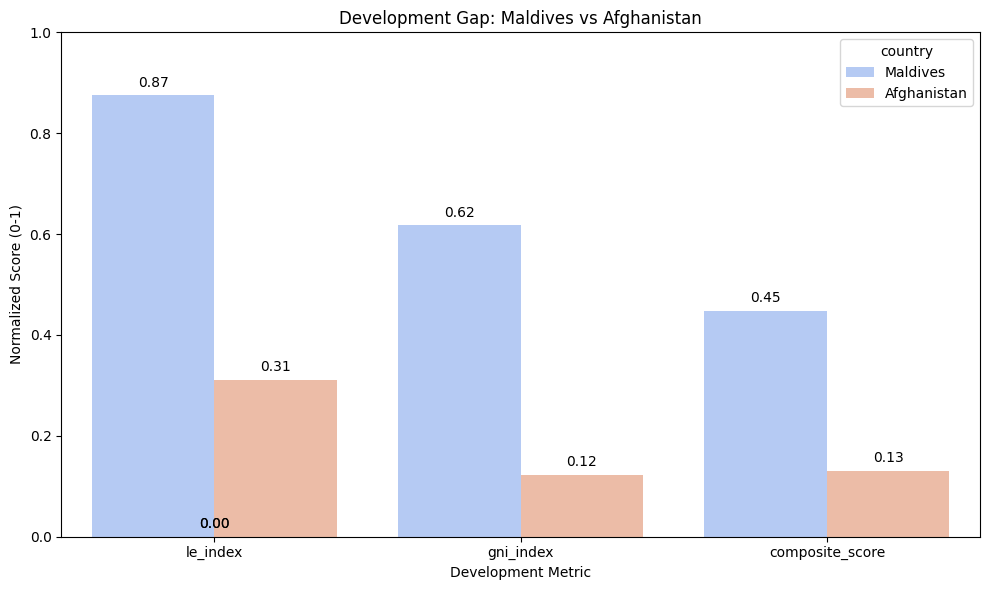

In [71]:
# Task 2-4: Development Gap Analysis

# 1. Load the composite score dataset
df_sa = pd.read_csv("HDI_SouthAsia_Composite.csv")

# 2. Identify Top and Bottom Countries
top_country = df_sa.iloc[0]
bottom_country = df_sa.iloc[-1]

print("--- Development Gap Analysis (South Asia) ---")
print(f"Top Performer: {top_country['country']}")
print(f"Bottom Performer: {bottom_country['country']}")

# 3. Calculate Gaps (Raw Values)
gap_composite = top_country['composite_score'] - bottom_country['composite_score']
gap_le = top_country['life_expectancy'] - bottom_country['life_expectancy']
gap_gni = top_country['gross_inc_percap'] - bottom_country['gross_inc_percap']

print(f"\nGap in Composite Score: {gap_composite:.4f}")
print(f"Gap in Life Expectancy: {gap_le:.1f} years")
print(f"Gap in GNI per Capita: ${gap_gni:,.2f}")

# 4. Visualization: Comparison of Indices
# Prepare data for plotting
comparison_df = df_sa.iloc[[0, -1]].copy()
comparison_melted = comparison_df.melt(id_vars='country',
                                       value_vars=['le_index', 'gni_index', 'composite_score'],
                                       var_name='Metric', value_name='Score')

plt.figure(figsize=(10, 6))
sns.barplot(data=comparison_melted, x='Metric', y='Score', hue='country', palette='coolwarm')
plt.title(f'Development Gap: {top_country["country"]} vs {bottom_country["country"]}')
plt.ylabel('Normalized Score (0-1)')
plt.xlabel('Development Metric')
plt.ylim(0, 1)

# Add value labels
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.2f}',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 9),
                       textcoords='offset points')

plt.tight_layout()
plt.savefig('task_2_4_gap_analysis.png')
print("\nPlot saved: 'task_2_4_gap_analysis.png'")

In [72]:
# Task 3-1: Middle East Filtering & Merging

# 1. Load the cleaned 2022 dataset
df = pd.read_csv("hdi_2022_cleaned.csv")

# 2. Filter for South Asia and Middle East
regions_of_interest = ['South Asia', 'Middle East']
df_comparative = df[df['region'].isin(regions_of_interest)].copy()

# 3. Validation
print("--- Region Counts in Comparative Dataset ---")
print(df_comparative['region'].value_counts())

# 4. List countries to ensure coverage
print("\n--- Middle East Countries Included ---")
print(df_comparative[df_comparative['region'] == 'Middle East']['country'].unique())

print("\n--- South Asia Countries Included ---")
print(df_comparative[df_comparative['region'] == 'South Asia']['country'].unique())

# 5. Save the comparative dataset
df_comparative.to_csv("hdi_comparative_regions.csv", index=False)
print("\nFile saved: 'hdi_comparative_regions.csv'")

--- Region Counts in Comparative Dataset ---
region
Middle East    20
South Asia      9
Name: count, dtype: int64

--- Middle East Countries Included ---
['Algeria' 'Bahrain' 'Djibouti' 'Egypt' 'Iraq' 'Israel' 'Jordan' 'Kuwait'
 'Lebanon' 'Libya' 'Morocco' 'Oman' 'Palestine, State of' 'Qatar'
 'Saudi Arabia' 'Syrian Arab Republic' 'Tunisia' 'Türkiye'
 'United Arab Emirates' 'Yemen']

--- South Asia Countries Included ---
['Afghanistan' 'Bangladesh' 'Bhutan' 'India' 'Iran (Islamic Republic of)'
 'Maldives' 'Nepal' 'Pakistan' 'Sri Lanka']

File saved: 'hdi_comparative_regions.csv'


In [73]:
# Task 3-2: Comparative Descriptive Statistics

# 1. Load the comparative dataset
df_comp = pd.read_csv("hdi_comparative_regions.csv")

# 2. Group by Region and Calculate Stats
stats_comp = df_comp.groupby('region')[['hdi', 'life_expectancy', 'gross_inc_percap']].describe().T

print("--- Comparative Statistics: South Asia vs Middle East (2022) ---")
print(stats_comp)

# 3. Specific Insight: Mean Differences
means = df_comp.groupby('region')[['hdi', 'life_expectancy', 'gross_inc_percap']].mean()
print("\n--- Mean Values Comparison ---")
print(means)

# Calculate Percentage Difference
pct_diff_hdi = ((means.loc['Middle East', 'hdi'] - means.loc['South Asia', 'hdi']) / means.loc['South Asia', 'hdi']) * 100
print(f"\nMiddle East HDI is {pct_diff_hdi:.2f}% higher than South Asia.")

# 4. Save stats to CSV
stats_comp.to_csv("hdi_comparative_stats.csv")
print("\nFile saved: 'hdi_comparative_stats.csv'")

--- Comparative Statistics: South Asia vs Middle East (2022) ---
region                   Middle East    South Asia
hdi              count     20.000000      9.000000
                 mean       0.750200      0.657778
                 std        0.135335      0.110137
                 min        0.424000      0.462000
                 25%        0.711500      0.601000
                 50%        0.740500      0.670000
                 75%        0.860000      0.762000
                 max        0.937000      0.780000
life_expectancy  count     20.000000      9.000000
                 mean      74.707300     71.718889
                 std        5.228666      5.508582
                 min       62.859000     62.879000
                 25%       72.262750     67.744000
                 50%       74.339500     72.229000
                 75%       78.655250     74.556000
                 max       82.601000     80.839000
gross_inc_percap count     20.000000      9.000000
                 

/tmp/ipython-input-1193311542.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_comp, x='region', y='hdi', palette='Set2', ax=axes[0])
/tmp/ipython-input-1193311542.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_comp, x='region', y='gross_inc_percap', palette='Set2', ax=axes[1])


Plot saved: 'task_3_3_comparative_visuals.png'


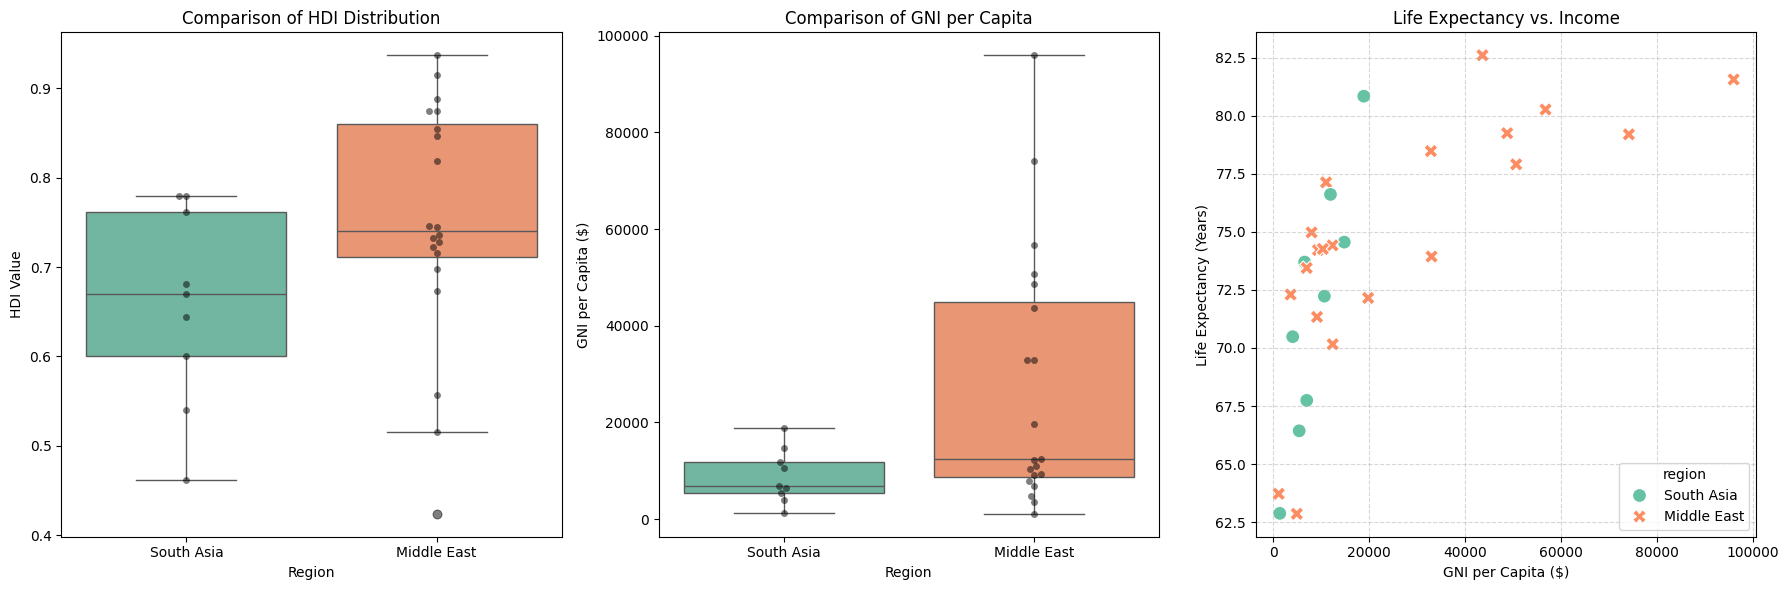

In [74]:
# Task 3-3: Comparative Visualization of Disparities

# 1. Load the comparative dataset
df_comp = pd.read_csv("hdi_comparative_regions.csv")

# 2. Set up the plotting grid
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1: Boxplot of HDI Distribution
sns.boxplot(data=df_comp, x='region', y='hdi', palette='Set2', ax=axes[0])
sns.swarmplot(data=df_comp, x='region', y='hdi', color='black', alpha=0.5, ax=axes[0]) # Add points
axes[0].set_title('Comparison of HDI Distribution')
axes[0].set_xlabel('Region')
axes[0].set_ylabel('HDI Value')

# Plot 2: Boxplot of GNI per Capita (Income)
sns.boxplot(data=df_comp, x='region', y='gross_inc_percap', palette='Set2', ax=axes[1])
sns.swarmplot(data=df_comp, x='region', y='gross_inc_percap', color='black', alpha=0.5, ax=axes[1])
axes[1].set_title('Comparison of GNI per Capita')
axes[1].set_xlabel('Region')
axes[1].set_ylabel('GNI per Capita ($)')

# Plot 3: Scatter Plot (Life Expectancy vs. Income)
sns.scatterplot(data=df_comp, x='gross_inc_percap', y='life_expectancy',
                hue='region', style='region', s=100, palette='Set2', ax=axes[2])
axes[2].set_title('Life Expectancy vs. Income')
axes[2].set_xlabel('GNI per Capita ($)')
axes[2].set_ylabel('Life Expectancy (Years)')
axes[2].grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.savefig('task_3_3_comparative_visuals.png')
print("Plot saved: 'task_3_3_comparative_visuals.png'")